In [1]:
import threading
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request

# Load the QAP instance data
QAP_INSTANCE_URL = 'https://qaplib.mgi.polymtl.ca/data.d/nug12.dat'

qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

line = qap_instance_file.readline()
n = int(line.decode()[:-1].split()[0])

A = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    A[i, :] = list(map(int, line.decode()[:-1].split()))

B = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    B[i, :] = list(map(int, line.decode()[:-1].split()))

In [2]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

def simulated_annealing(T, radius, alpha, no_bars = 100):
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)

    successes = np.zeros(T)
    accepted_failures = np.zeros(T)

    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        delta = q_cost - p_cost
        if delta < 0:
            # Success
            p, p_cost = q, q_cost
            successes[t] = 1
        else:
            acceptance_probability = np.exp(- alpha * delta * t/T)
            if np.random.rand() < acceptance_probability:
                # Accepted failure
                p, p_cost = q, q_cost
                accepted_failures[t] = 1
        costs[t] = p_cost

    print("Time taken: {:.2f} seconds, Minimum cost found: {}".format(time.time() - t0, costs.min()))


    no_intervals = T // no_bars
    succ = successes.reshape(no_bars, -1)
    succ = succ.sum(axis=1)
    
    acpt = accepted_failures.reshape(no_bars, -1)
    acpt = acpt.sum(axis=1)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    
    plt.title(f'Params: alpha: {alpha}, radius: {radius}')
    
    ax[0].set_title('Successes')
    ax[0].bar(np.arange(no_bars)*no_intervals,
            succ,
            no_intervals//2, color='g')
    
    ax[1].set_title('Accepted losses')
    ax[1].bar(np.arange(no_bars)*no_intervals,
            acpt,
            no_intervals//2, color='r')
    plt.show()

T = 300000, radius = 1, alpha = 0.5
Time taken: 9.85 seconds, Minimum cost found: 578.0


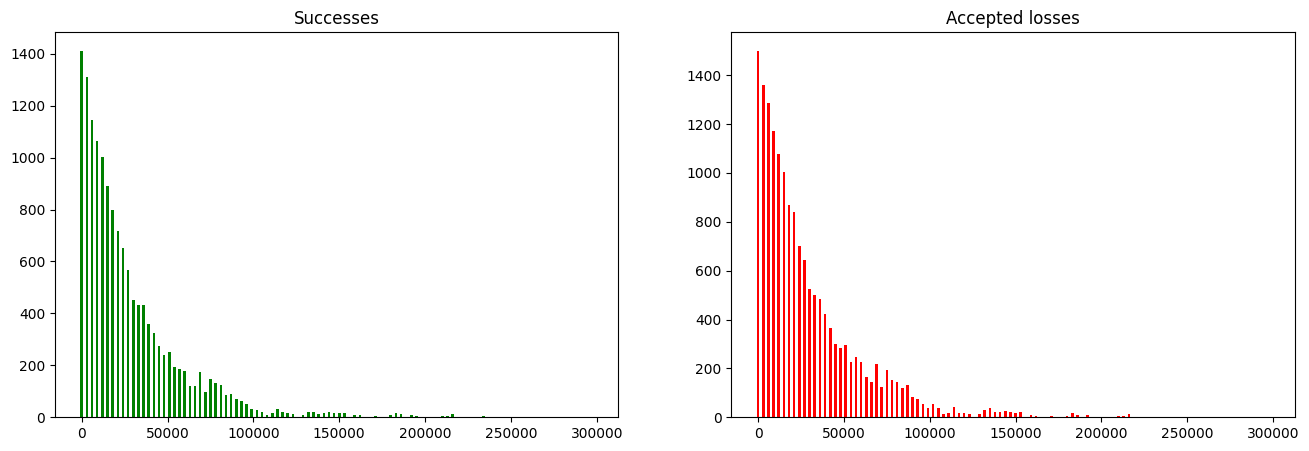

T = 300000, radius = 1, alpha = 0.6
Time taken: 9.86 seconds, Minimum cost found: 578.0


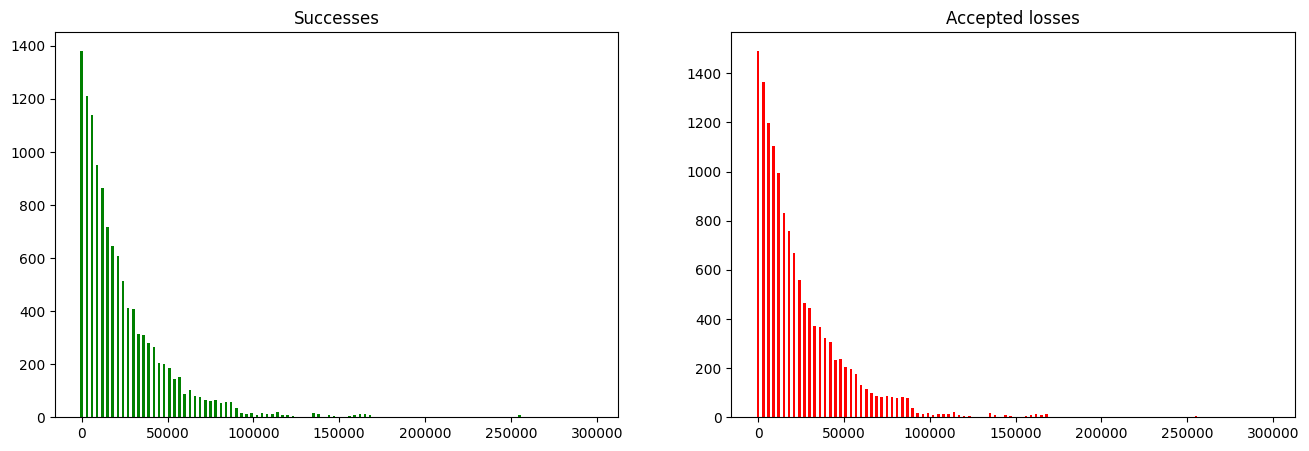

T = 300000, radius = 1, alpha = 0.7
Time taken: 9.97 seconds, Minimum cost found: 578.0


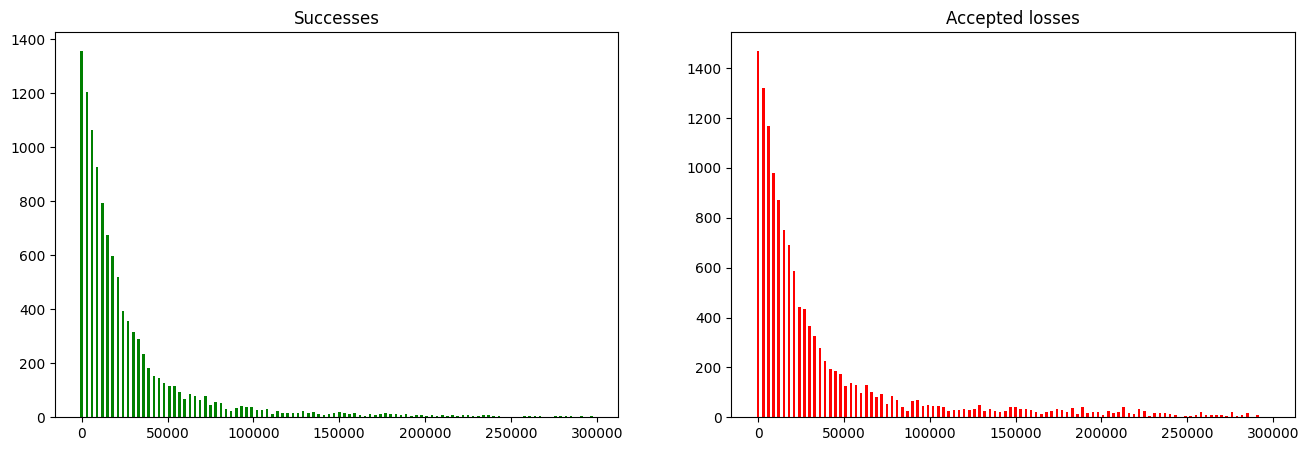

T = 300000, radius = 1, alpha = 0.7999999999999999
Time taken: 9.92 seconds, Minimum cost found: 578.0


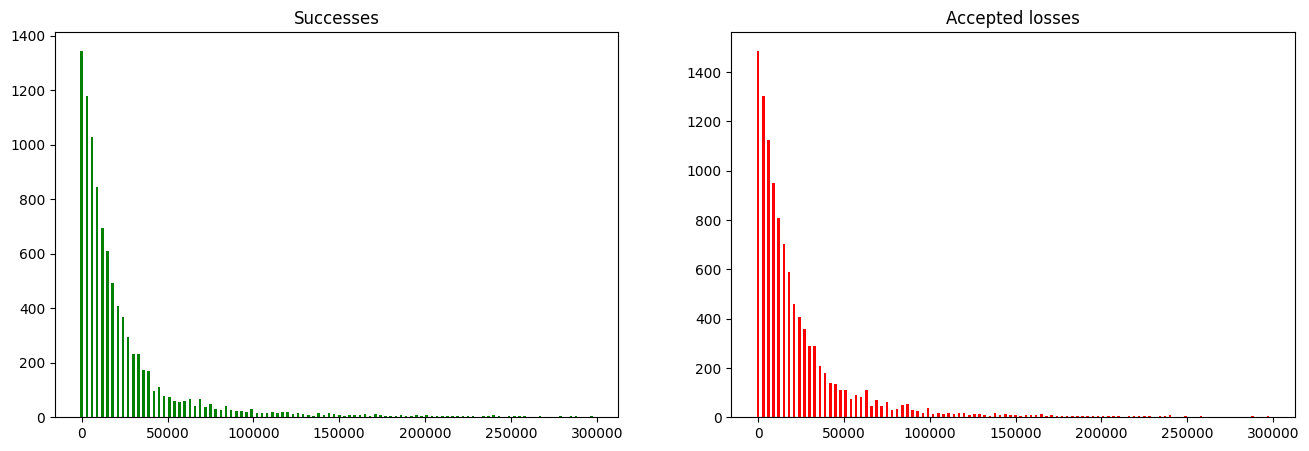

T = 300000, radius = 1, alpha = 0.8999999999999999
Time taken: 9.85 seconds, Minimum cost found: 582.0


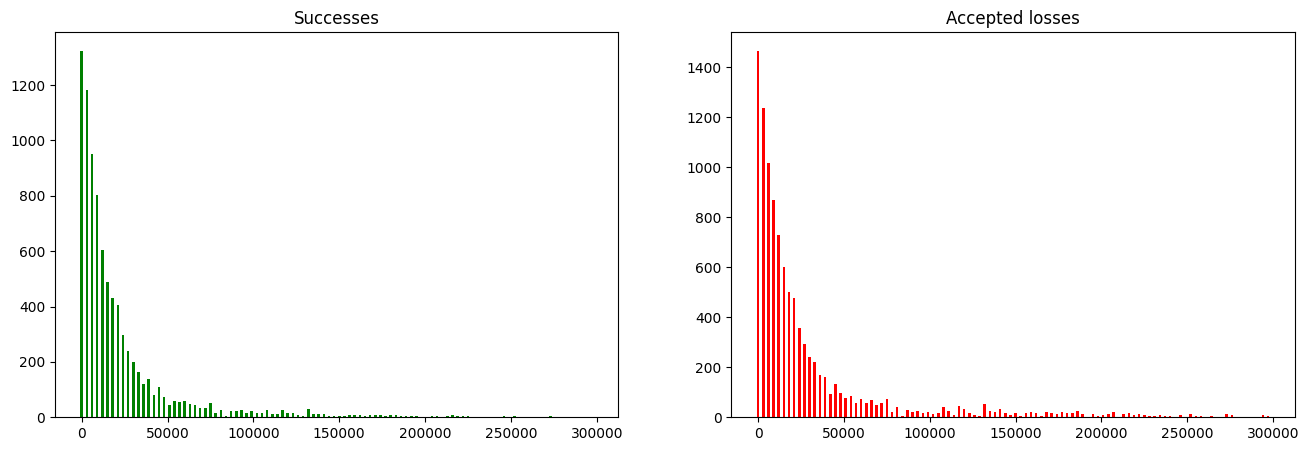

T = 300000, radius = 1, alpha = 0.9999999999999999
Time taken: 9.92 seconds, Minimum cost found: 578.0


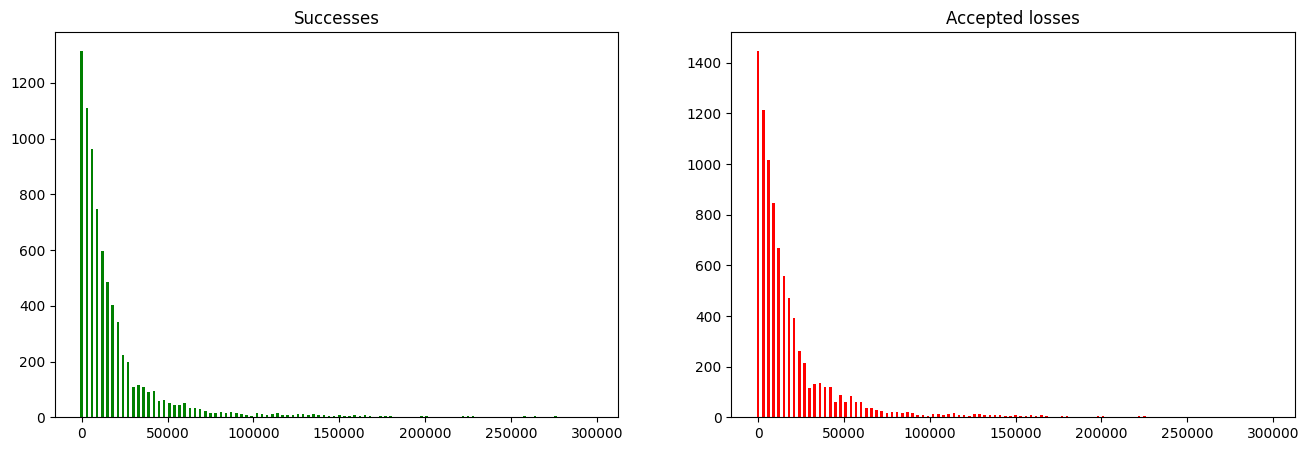

T = 300000, radius = 1, alpha = 1.0999999999999999
Time taken: 9.96 seconds, Minimum cost found: 578.0


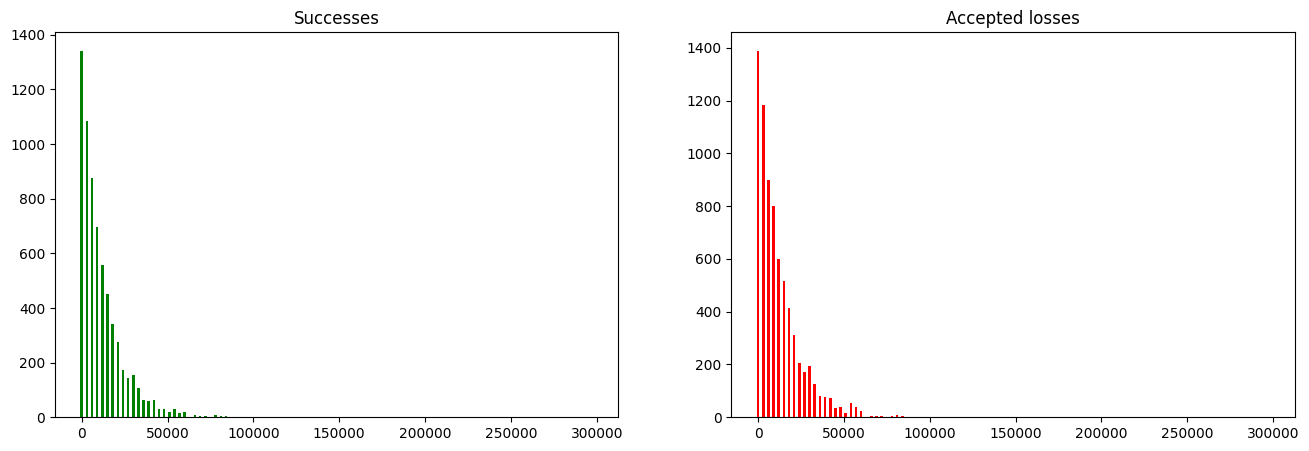

In [3]:
for alpha in np.arange(0.5, 1.1, 0.1):
    print(f"T = 300000, radius = 1, alpha = {alpha}")
    simulated_annealing(T=300000, radius=1, alpha=alpha)